In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [17]:
df = pd.read_csv('measurements/all_measurements.csv')
data = df.iloc[:,1:]
data = data.dropna()
data

,sensorId,latitude,longitude,elevation,fromDateTime,tillDateTime,PM1,PM25,PM10,pressure,humidity,temperature,wind_speed,wind_bearing
24,10039,50.067312,19.903360,203.88,2022-03-11 15:00:00+00:00,2022-03-11 16:00:00+00:00,2.33,3.35,4.63,1032.74,29.06,0.42,19.70,95.65
25,10039,50.067312,19.903360,203.88,2022-03-11 16:00:00+00:00,2022-03-11 17:00:00+00:00,3.95,5.85,8.05,1032.75,34.41,-0.53,18.53,92.94
26,10039,50.067312,19.903360,203.88,2022-03-11 17:00:00+00:00,2022-03-11 18:00:00+00:00,5.18,7.44,10.29,1033.03,44.89,-2.14,16.34,89.04
27,10039,50.067312,19.903360,203.88,2022-03-11 18:00:00+00:00,2022-03-11 19:00:00+00:00,7.83,11.63,16.38,1033.04,52.23,-3.17,14.98,96.00
28,10039,50.067312,19.903360,203.88,2022-03-11 19:00:00+00:00,2022-03-11 20:00:00+00:00,8.65,13.02,18.81,1033.17,55.11,-3.89,13.49,96.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75955,86998,50.133024,19.973249,279.92,2022-04-01 17:00:00+00:00,2022-04-01 18:00:00+00:00,14.11,23.46,31.12,1000.70,93.55,-0.83,13.31,11.24
75956,86998,50.133024,19.973249,279.92,2022-04-01 18:00:00+00:00,2022-04-01 19:00:00+00:00,15.38,25.00,33.89,1001.04,93.92,-0.89,13.10,11.08
75957,86998,50.133024,19.973249,279.92,2022-04-01 19:00:00+00:00,2022-04-01 20:00:00+00:00,16.22,26.13,35.92,1001.07,94.25,-0.85,12.17,6.96
75958,86998,50.133024,19.973249,279.92,2022-04-01 20:00:00+00:00,2022-04-01 21:00:00+00:00,14.92,23.76,31.02,1001.30,95.38,-1.06,12.47,0.97


In [18]:
data['month'] = data['fromDateTime'].map(lambda x:datetime.fromisoformat(x).month)
data['day'] = data['fromDateTime'].map(lambda x:datetime.fromisoformat(x).weekday())
data['day'] = data['fromDateTime'].map(lambda x:datetime.fromisoformat(x).hour)
data.drop(['fromDateTime', 'tillDateTime'], axis=1, inplace=True)
data

,sensorId,latitude,longitude,elevation,PM1,PM25,PM10,pressure,humidity,temperature,wind_speed,wind_bearing,month,day
24,10039,50.067312,19.903360,203.88,2.33,3.35,4.63,1032.74,29.06,0.42,19.70,95.65,3,15
25,10039,50.067312,19.903360,203.88,3.95,5.85,8.05,1032.75,34.41,-0.53,18.53,92.94,3,16
26,10039,50.067312,19.903360,203.88,5.18,7.44,10.29,1033.03,44.89,-2.14,16.34,89.04,3,17
27,10039,50.067312,19.903360,203.88,7.83,11.63,16.38,1033.04,52.23,-3.17,14.98,96.00,3,18
28,10039,50.067312,19.903360,203.88,8.65,13.02,18.81,1033.17,55.11,-3.89,13.49,96.63,3,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75955,86998,50.133024,19.973249,279.92,14.11,23.46,31.12,1000.70,93.55,-0.83,13.31,11.24,4,17
75956,86998,50.133024,19.973249,279.92,15.38,25.00,33.89,1001.04,93.92,-0.89,13.10,11.08,4,18
75957,86998,50.133024,19.973249,279.92,16.22,26.13,35.92,1001.07,94.25,-0.85,12.17,6.96,4,19
75958,86998,50.133024,19.973249,279.92,14.92,23.76,31.02,1001.30,95.38,-1.06,12.47,0.97,4,20


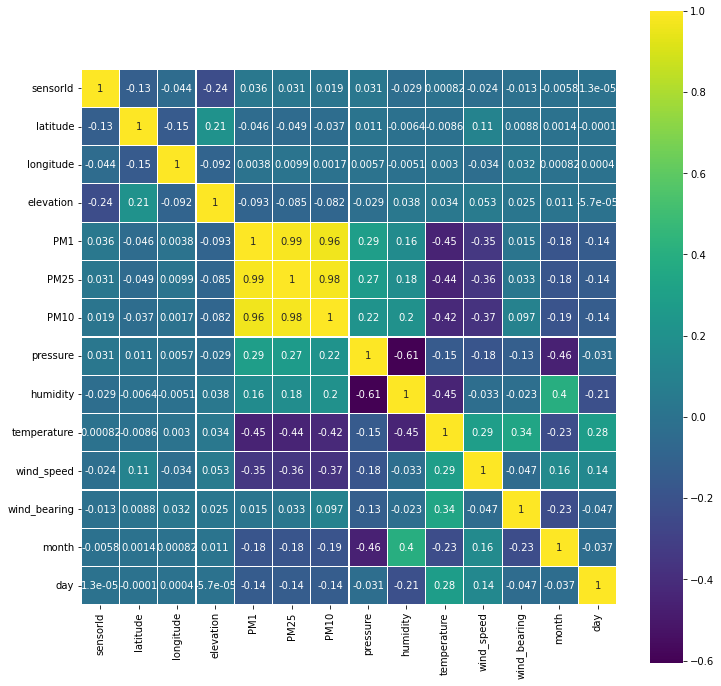

In [19]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,
square=True, cmap=colormap, linecolor='white', annot=True)

In [20]:
data = (data-data.mean())/data.std()
data

,sensorId,latitude,longitude,elevation,PM1,PM25,PM10,pressure,humidity,temperature,wind_speed,wind_bearing,month,day
24,-0.791153,-0.118820,-0.381552,-0.977837,-1.596566,-1.541431,-1.542966,0.640843,-1.477994,-0.883810,1.455139,-0.476731,-0.247648,0.505466
25,-0.791153,-0.118820,-0.381552,-0.977837,-1.416175,-1.374432,-1.369559,0.641559,-1.223778,-1.047921,1.250988,-0.502890,-0.247648,0.649892
26,-0.791153,-0.118820,-0.381552,-0.977837,-1.279211,-1.268220,-1.255983,0.661600,-0.725799,-1.326045,0.868861,-0.540535,-0.247648,0.794319
27,-0.791153,-0.118820,-0.381552,-0.977837,-0.984127,-0.988328,-0.947197,0.662316,-0.377025,-1.503975,0.631558,-0.473352,-0.247648,0.938746
28,-0.791153,-0.118820,-0.381552,-0.977837,-0.892817,-0.895476,-0.823987,0.671621,-0.240175,-1.628353,0.371572,-0.467271,-0.247648,1.083173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75955,1.460422,0.907506,0.471574,0.532820,-0.284832,-0.198085,-0.199824,-1.652440,1.586379,-1.099745,0.340164,-1.291514,4.037939,0.794319
75956,1.460422,0.907506,0.471574,0.532820,-0.143414,-0.095213,-0.059375,-1.628105,1.603960,-1.110110,0.303522,-1.293059,4.037939,0.938746
75957,1.460422,0.907506,0.471574,0.532820,-0.049877,-0.019730,0.043553,-1.625958,1.619641,-1.103200,0.141249,-1.332828,4.037939,1.083173
75958,1.460422,0.907506,0.471574,0.532820,-0.194636,-0.178045,-0.204895,-1.609495,1.673335,-1.139477,0.193595,-1.390648,4.037939,1.227599


In [21]:
array = data.values
pca = PCA()
X_pca = pca.fit_transform(array)
X_pca/=10

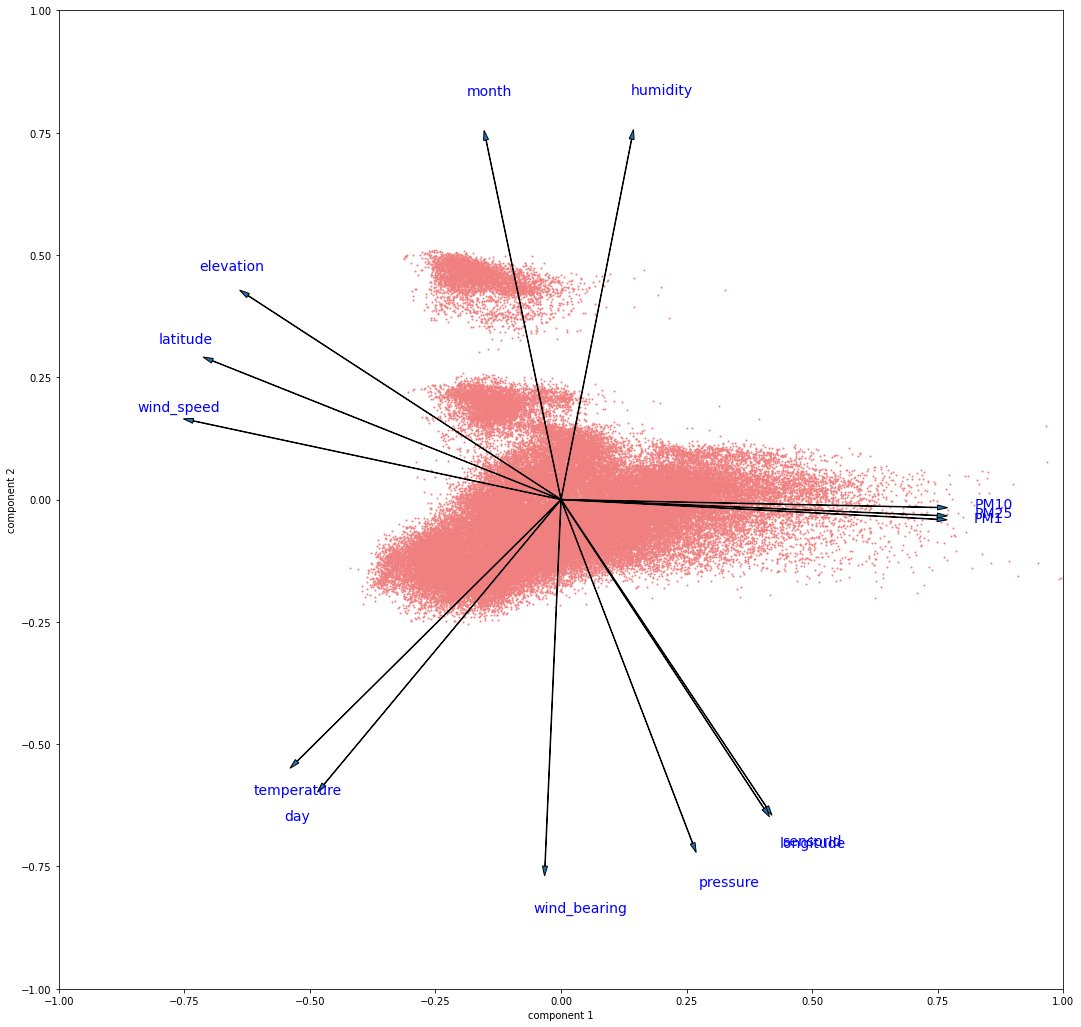

In [22]:
x_points = X_pca[:, 0]
y_points = X_pca[:, 1]

comps0 = pca.components_[0]
comps1 = pca.components_[1]

plt.figure(figsize=(18, 18))
plt.scatter(x_points, y_points, c='lightcoral', s=1)
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.xlim([-1, 1])
plt.ylim([-1, 1])
comps_zipped = zip(pca.components_[0], pca.components_[1], data.columns.values)

for i, comps in enumerate(comps_zipped):
    x, y, trait = comps
    length = np.sqrt(x**2 + y**2)
    x *= 3/(4*length)
    y *= 3/(4*length)
    plt.arrow(0, 0, x, y, head_width=0.01, head_length=0.02)
    x *= 9/8
    x -= 0.02
    y *= 9/8
    plt.text(x, y, trait, fontsize=14, c='blue')

plt.show()